<a href="https://colab.research.google.com/github/AsishMandoi/Quantum-Computing/blob/main/QC_circiuts_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swapping Qubits
*Author: Asish Kumar Mandoi, BTech EE, IIT Kanpur*

In [ ]:
import numpy as np
!pip install qiskit
!pip install pylatexenc
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi, sqrt

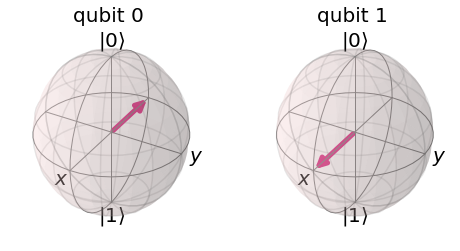

In [ ]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
q=QuantumRegister(2, 'psi')
c=ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

plus = [1/sqrt(2), 1/sqrt(2)]
minus = [1/sqrt(2), -1/sqrt(2)]

initial_state = plus

# Initialize psi_0 to |+⟩
circuit.initialize(initial_state, [q[0]])

# Add a X gate then a H gate to psi_1 in order to convert it to |-⟩
circuit.x(1)
circuit.h(1)

def swap(qc, qubit_0, qubit_1):
    # Swapping psi_0 and psi_1
    qc.cx(qubit_0, qubit_1)
    qc.cx(qubit_1, qubit_0)
    qc.cx(qubit_0, qubit_1)
    return

swap(circuit, q[0], q[1])


# Visualizing thorugh Bloch Sphere
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(circuit)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)


Total counts are: {'01': 100}


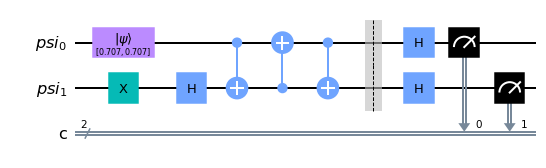

In [ ]:
# circuit.measure(q, c)
# Map the quantum measurement to the classical bits
def x_measurement(qc, qubit, cbit):
    # Measure 'qubit' in the H-basis, and store the result in 'cbit'
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

x_measurement(circuit, [q[0], q[1]], [c[0], c[1]])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=100)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)

# Draw the circuit
circuit.draw(output='mpl')

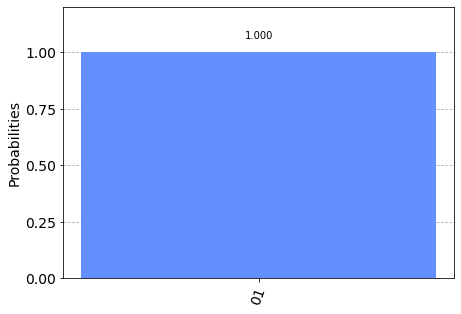

In [ ]:
plot_histogram(counts)